In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


### Creating data to view and fit

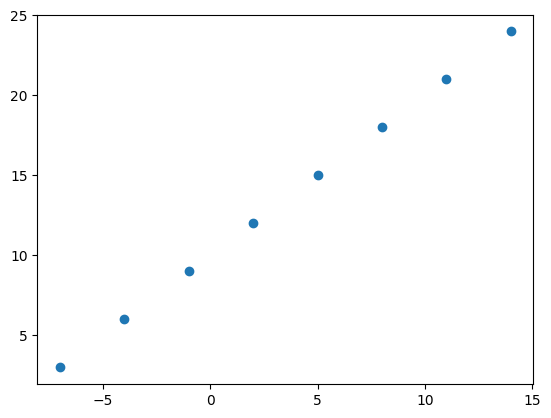

In [2]:
X = tf.constant([-7.0, -4.0, -1.0,  2.0,  5.0,  8.0, 11.0, 14.0])
y = tf.constant([ 3.0,  6.0,  9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

In [3]:
y==X+10 #the relation

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

### Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

In [4]:
# Example input and output shapes of a housing price regression model
infos=tf.constant(["rooms","garage","bethroom"])#shape=3
price=tf.constant([1000000])#shape=1
infos,price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'rooms', b'garage', b'bethroom'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1000000], dtype=int32)>)

In [5]:
X[0].shape , X.shape

(TensorShape([]), TensorShape([8]))

The whole dataset has shape (8,) → 8 numbers.

But a single example from it has shape () → just one number.

📌 Why this matters:
When you build a neural network, you must tell it the shape of a single example, not the whole dataset. That’s called the input shape of the model.



## Your first model : 
In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

Fitting a model - letting the model try to find patterns in the data (how does X get to y).


In [6]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)]
)
model.compile(loss=tf.keras.losses.mae ,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X,axis=1),y,epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.1802 - mae: 12.1802
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 12.0477 - mae: 12.0477
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 11.9152 - mae: 11.9152
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 11.7827 - mae: 11.7827
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 11.6502 - mae: 11.6502


Sequential: This creates a linear stack of layers (one after another)
Dense(1): This is a fully connected layer with just 1 neuron
Dense layers connect every input to every output
With 1 neuron, this model will output a single number (like predicting a price, temperature, etc.)

What is a Dense Layer?
Think of a Dense layer like a connection hub where every input connects to every output.

Input Features:    Dense Layer (1 neuron):    Output:

[house_size]  ──────┐
                    │
[bedrooms]    ──────┼────── [neuron] ────── [predicted_price]
                    │
[location]    ──────┘

How it Works:

Every input connects to the neuron: All 3 features connect to that 1 neuron
The neuron does math: It multiplies each input by a weight and adds them up
neuron_output = (house_size × weight1) + (bedrooms × weight2) + (location × weight3) + bias

Produces 1 output: Since there's only 1 neuron, you get 1 prediction

Why "Fully Connected"?

Fully connected = every input touches every neuron
If you had 2 neurons, each input would connect to BOTH neurons

-------------------------------------------------------------------------------------------------------
loss: How the model measures how "wrong" it is

MAE (Mean Absolute Error): Takes the average of absolute differences between predictions and actual values
Example: if actual=10 and prediction=7, error = |10-7| = 3

optimizer: How the model learns and improves

SGD (Stochastic Gradient Descent): A basic learning algorithm that adjusts the model's weights to reduce the loss

metrics: What to track during training (here, also MAE for monitoring)

--------------------------------------------------------------------------------------------------

tf.expand_dims(X, axis=-1): This reshapes your input data

If X was shape (100,) → becomes (100, 1)
Neural networks expect 2D input: (samples, features)
The -1 means "add dimension at the end"

epochs=5: The model will see the entire dataset 5 times

Each epoch = one complete pass through all your training data

This is a simple linear regression model that learns to map input X to output y with a straight line relationship!

In [7]:
#let's try the model
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
pr=model.predict(tf.expand_dims([16],axis=1))
pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[8.88324]], dtype=float32)

In [9]:
#15!?, thats wrong, lets step back and see the last value of loss (10.2007)
pr+10.2007 #25.71 = almost 26 /its not always representive thought

array([[19.083939]], dtype=float32)

### Improving our model 
To improve our model, we alter almost every part of the 3 steps we went through before.

Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [10]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 50 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #Remember that potantially Lr is the most important hyper parameter on all of your neural network
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 15.8732 - mae: 15.8732
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 14.9102 - mae: 14.9102
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 14.2198 - mae: 14.2198
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 13.5646 - mae: 13.5646
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 12.9172 - mae: 12.9172
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 12.2718 - mae: 12.2718
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 11.6251 - mae: 11.6251
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 10.9741 - mae: 10.9741
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 10.3163 - mae: 10.3163
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 9.6494 - mae: 9.6494
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 8.9705 - mae: 8.9705
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 8.2771 - mae: 8.2771
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [11]:
pr=model.predict(tf.expand_dims([16],axis=1))
pr #its now better!!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[25.684519]], dtype=float32)

### Evaluating our model
whent it comes to evaluate a model you should always think of one word "Visualisation"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [12]:
#let's create a bigger dataset 
X=tf.range(-100,100,4)
y=X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

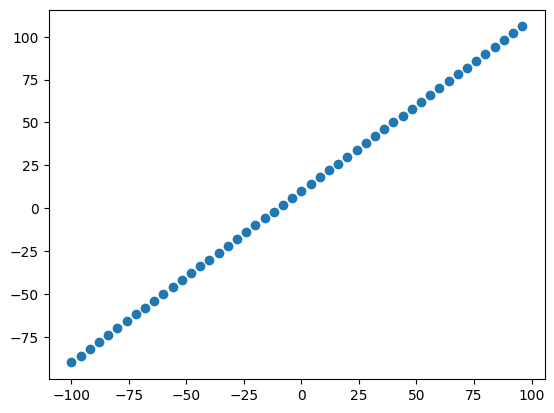

In [13]:
plt.scatter(X,y)

### Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

In [14]:
train_datax=X[:40]
train_datay=y[:40]
vald_datax=X[40:]
vald_datay=y[40:]

### Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

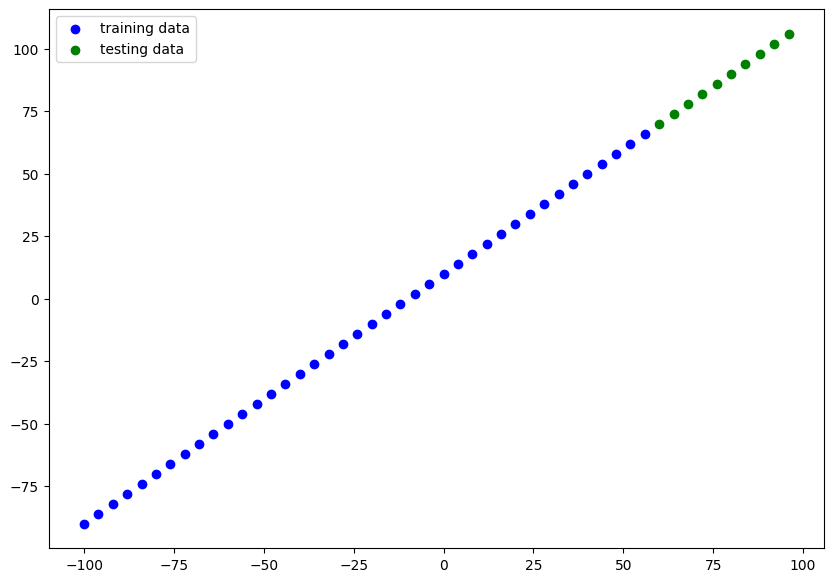

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(train_datax,train_datay,c='b',label="training data")
plt.scatter(vald_datax,vald_datay,c='g',label="testing data")
plt.legend()


Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

In [16]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

### Visualizing the model
After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling summary() on it.

🔑 Note: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [17]:
# Doesn't work (model not fit/built)
model.summary() #doesnt work

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

You did not tell Keras what shape of input data to expect.
So internally, the model is in an “unbuilt” state — it doesn’t know:

How many inputs come in (1 number? 10 numbers? an image?).

Therefore, it also doesn’t know how many weights to create.

That’s why calling model.summary() failed — there’s no weight matrix to show yet, because the model hasn’t been built.

In [18]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


c:\Users\boudi\OneDrive\Desktop\TenserFlow\tvenv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

dense_4 (Dense)

This is a Dense (fully connected) layer.

It has 1 output neuron (since you wrote Dense(1)).

Output shape = (None, 1):

None means the batch size can be anything (flexible).

1 means for every input, the model outputs 1 number (a prediction).

Param # = 2

Why 2 parameters?

Because in linear regression, the equation is:

y=w⋅x+b

w = weight (1 parameter)

b = bias (1 parameter)

Total = 2 trainable parameters.

Trainable params = 2

Both weight and bias will be learned (adjusted) during training.

Non-trainable params = 0

Nothing is frozen — all parameters can be updated.

✅ So, your model is basically just:

y=w⋅x+b

( at some point we will have to freez the learning of some parametres ! )

### valuable notes to better understand neural network form
 model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,))
]) 
Dense(1) means that the shape of output is one number 
input shape is defined 
( In Keras, the input layer is not explicitly written — it’s implied by input_shape.
The layer you define is the first actual computation layer.
The last layer is considered the output layer. )
this nn doesnt have a hidden layer .


Parameters=(Number of inputs per neuron × Number of neurons) + (Number of neurons for biases)
Each neuron has one weight per input.
Each neuron also has 1 bias 

Let's try another example 

In [20]:

# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (same as above)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])
     

note : at first try using SGD to compile : model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])(to show student how important is to pick the right optimizer ) and after ploting use Adam and replot 

In [21]:
# let's fit the model
model.fit(train_datax,train_datay, epochs=100, verbose=0)


In [22]:
model.summary() #learnable parameters=31 (using the last rule)

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

Reminder : Total params - total number of parameters in the model.

Trainable parameters - these are the parameters (patterns) the model can update as it trains.

Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

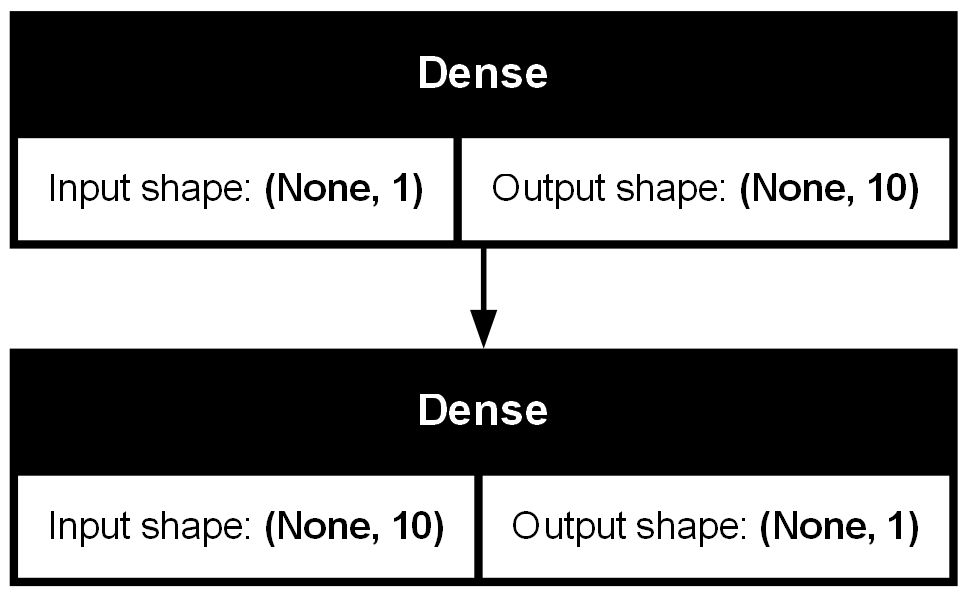

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True ) ## you sould install pydot and graphviz using pip and install also graphviz from the offecial website

In [24]:
ypredict=model.predict(vald_datax)
ypredict,vald_datay 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


(array([[ 70.42367],
        [ 74.44228],
        [ 78.4609 ],
        [ 82.47952],
        [ 86.49813],
        [ 90.51675],
        [ 94.53536],
        [ 98.55397],
        [102.57259],
        [106.59121]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

## visualizing predictions 

In [25]:
def plotprediction(trainx=train_datax,
                   trainy=train_datay,
                   testx=vald_datax,
                   testy=vald_datay,
                   predection=ypredict
                   ):
    plt.Figure(figsize=(10,7))
    plt.scatter(train_datax,train_datay,c='b',label="Training data")
    plt.scatter(vald_datax,vald_datay,c='g',label="Testing data")
    plt.scatter(vald_datax,predection,c='r',label="Pridected data")
    plt.legend()

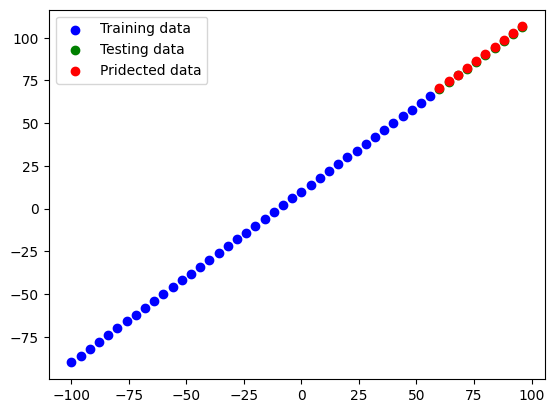

In [26]:
plotprediction()

### Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.
Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In our case, since we used MAE for the loss function as well as MAE for the metrics, model.evaulate() returns them both.

TensorFlow also has built in functions for MSE and MAE

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).
Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find the patterns in the data

In [27]:
def mae(y_true, y_pred):
    """
    Calculates Mean Absolute Error between y_true and y_pred.
    """
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def mse(y_true, y_pred):
    """
    Calculates Mean Squared Error between y_true and y_pred.
    """
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [28]:
mae(vald_datay,ypredict),mse(vald_datay,ypredict)

(<tf.Tensor: shape=(), dtype=float32, numpy=13.28145980834961>,
 <tf.Tensor: shape=(), dtype=float32, numpy=265.4889831542969>)

🔑 Note: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Loading a model

We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

# BACK 
# BACK 
# BACK 
# BACK 
# BACK 


### A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available Medical Cost dataset available from Kaggle and hosted on GitHub.

🔑 Note: When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

In [2]:
import pandas as pd
insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

lets see some variables types : 

In [3]:
insurance.age,insurance.sex

(0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64,
 0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object)

ah! , do u remember what we have to do to non numerical features before passing them to ml model ? turn them into numbers
To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [4]:

# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


lets create our training and validation sets

In [5]:
x=insurance_one_hot.drop("charges", axis=1)
y=insurance_one_hot["charges"]
x.head ,  y.head

(<bound method NDFrame.head of       age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0        True     False      False        True   
 1      18  33.770         1       False      True       True       False   
 2      28  33.000         3       False      True       True       False   
 3      33  22.705         0       False      True       True       False   
 4      32  28.880         0       False      True       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3       False      True       True       False   
 1334   18  31.920         0        True     False       True       False   
 1335   18  36.850         0        True     False       True       False   
 1336   21  25.800         0        True     False       True       False   
 1337   61  29.070         0        True     False      False        True   
 
       region_northeast  region_northwest  r

### Lets split the dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
x.loc[0].shape , y.shape

((11,), (1338,))

In [11]:
X_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_tensor.shape , y_tensor.shape

(TensorShape([1070, 11]), TensorShape([1070]))

In [12]:
tf.random.set_seed(42)
examplemodel=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100 , input_shape=(11,)),
        tf.keras.layers.Dense(100)
        ,tf.keras.layers.Dense(1)  # output layer → 1 value per sample
 
    ])
examplemodel.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
examplemodel.fit(X_tensor,y_tensor,epochs=50)

Epoch 1/50


c:\Users\boudi\OneDrive\Desktop\TenserFlow\tvenv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13187.5195 - mae: 13187.5195
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12445.2080 - mae: 12445.2080
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10375.7129 - mae: 10375.7129
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7840.2515 - mae: 7840.2515
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7392.8926 - mae: 7392.8926
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7348.8813 - mae: 7348.8813
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7304.8042 - mae: 7304.8042
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7262.0591 - mae: 7262.0591
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7218.4839 - mae: 7218.4839
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7172.2422 - mae: 7172.2422
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7124.5615 - mae: 7124.5615
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7074.0874

In [16]:
yex=examplemodel.predict(X_test)
y_test , yex

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(764      9095.06825
 887      5272.17580
 890     29330.98315
 1293     9301.89355
 259     33750.29180
            ...     
 109     47055.53210
 575     12222.89830
 535      6067.12675
 543     63770.42801
 846      9872.70100
 Name: charges, Length: 268, dtype: float64,
 array([[ 9781.656  ],
        [ 6030.638  ],
        [20378.385  ],
        [ 9476.189  ],
        [ 7835.406  ],
        [ 4918.415  ],
        [ 1424.904  ],
        [13021.95   ],
        [ 4262.248  ],
        [10302.385  ],
        [11496.821  ],
        [ 7724.6978 ],
        [ 4630.688  ],
        [16523.088  ],
        [18887.229  ],
        [16306.8545 ],
        [10539.745  ],
        [16389.998  ],
        [ 9161.521  ],
        [14765.721  ],
        [ 4176.703  ],
        [ 7693.812  ],
        [  350.5927 ],
        [ 2845.0767 ],
        [11122.472  ],
        [11338.705  ],
        [11905.109  ],
        [ 4994.149  ],
        [10327.996  ],
        [  682.4752 ],
        [ 8332.74   ],
        [11